In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

from lib.velocity import stokes_velocity, simmel_velocity, calc_dynamic_viscosity, beard_terminal_velocity

In [3]:
gunn_df = pd.read_csv("./data/vT_Gunn1949.csv")
dynvis_df = pd.read_csv('./data/dynvis_Rogers_Table.csv')
best_df = pd.read_csv("./data/vT_Best1950.csv")

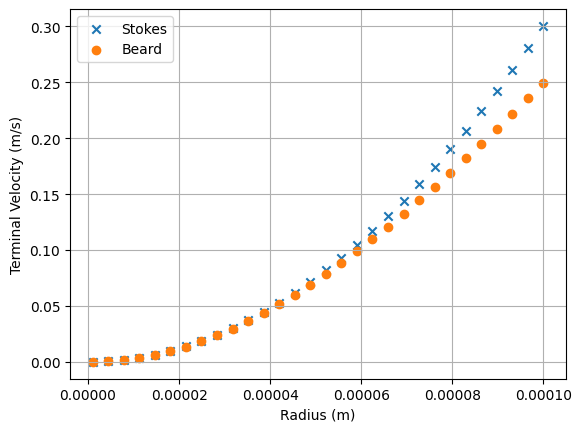

In [4]:
data = {
    'd_m': np.linspace(1e-6,1e-4, 30),
    'T': [291.15] * 30,
    'P': [101325] * 30,
}

df = pd.DataFrame(data)

df['vT_stokes'] = df.apply(lambda row: stokes_velocity(row['d_m'], 998.0, calc_dynamic_viscosity(row['T'])), axis=1)
df['vT_beard'] = df.apply(lambda row: beard_terminal_velocity(row['d_m'], row['T'], row['P']), axis=1)

plt.scatter(df['d_m'], df['vT_stokes'], label='Stokes', marker='x')
plt.scatter(df['d_m'], df['vT_beard'], label='Beard')
plt.xlabel('Radius (m)')
plt.ylabel('Terminal Velocity (m/s)')
plt.legend()
plt.grid()
plt.show()

count    10000.000000
mean         0.041203
std          0.039957
min          0.000008
25%          0.009418
50%          0.027682
75%          0.062628
max          0.352466
Name: rel_err, dtype: float64


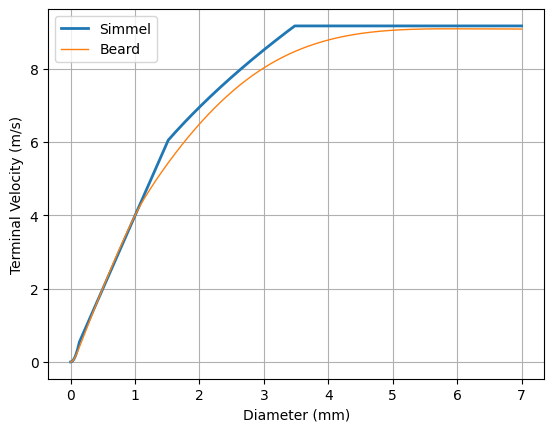

In [16]:
points = 10_000
simmel_data = {
    'd_m': np.linspace(1e-6, 7e-3, points),
    'T': [291.15] * points,
    'P': [101325] * points,
}

simmel_df = pd.DataFrame(simmel_data)

simmel_df['vT_simmel'] = simmel_df.apply(lambda row: simmel_velocity(row['d_m'], row['T'], row['P']), axis=1)
simmel_df['vT_beard'] = simmel_df.apply(lambda row: beard_terminal_velocity(row['d_m'], row['T'], row['P']), axis=1)

simmel_df['abs_err'] = np.abs(simmel_df['vT_simmel'] - simmel_df['vT_beard'])
simmel_df['rel_err'] = simmel_df['abs_err'] / simmel_df['vT_beard']

print(simmel_df['rel_err'].describe())

plt.plot(simmel_df['d_m'] * 1000, simmel_df['vT_simmel'], label='Simmel', lw=2)
plt.plot(simmel_df['d_m'] * 1000, simmel_df['vT_beard'], label='Beard', lw=1)
plt.xlabel('Diameter (mm)')
plt.ylabel('Terminal Velocity (m/s)')
plt.legend()
plt.grid()
plt.show()

In [6]:
gunn_T = 293.15 # K
gunn_P = 101_325 # Pa

gunn_df['vT_beard'] = gunn_df.apply(lambda row: beard_terminal_velocity(
    2*row['r_m'],
    gunn_T,
    gunn_P,
), axis=1)

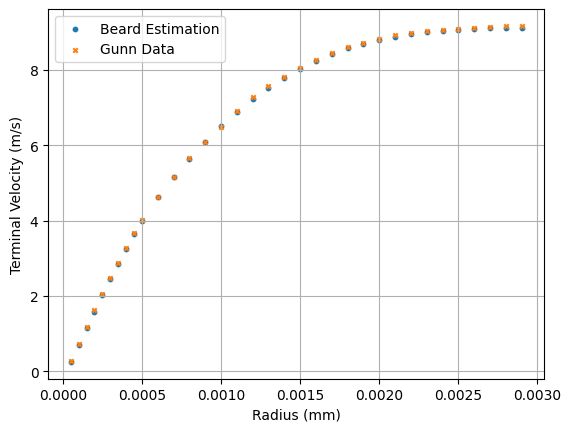

In [7]:
plt.scatter(gunn_df['r_m'], gunn_df['vT_beard'], label='Beard Estimation', s=10)
plt.scatter(gunn_df['r_m'], gunn_df['v'], label='Gunn Data', marker="x", s=10)
plt.xlabel('Radius (mm)')
plt.ylabel('Terminal Velocity (m/s)')
plt.legend()
plt.grid()
plt.show()

In [8]:
best_T=291 #K

best_df['vT_beard'] = best_df.apply(lambda row: beard_terminal_velocity(
    2*row['r_m'],
    best_T,
    row['p_Pa'],
), axis=1)

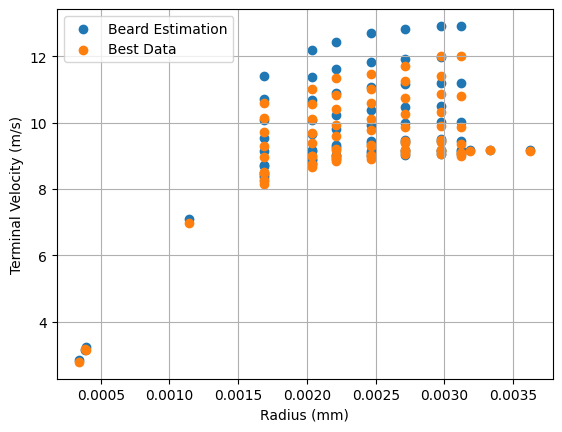

In [9]:
plt.scatter(best_df['r_m'], best_df['vT_beard'], label='Beard Estimation')
plt.scatter(best_df['r_m'], best_df['v'], label='Best Data')
plt.xlabel('Radius (mm)')
plt.ylabel('Terminal Velocity (m/s)')
plt.legend()
plt.grid()
plt.show()

In [10]:

dynvis_df['dyn_vis_SI_calc'] = dynvis_df.apply(lambda row: calc_dynamic_viscosity(
    row['T_K'],
), axis=1)


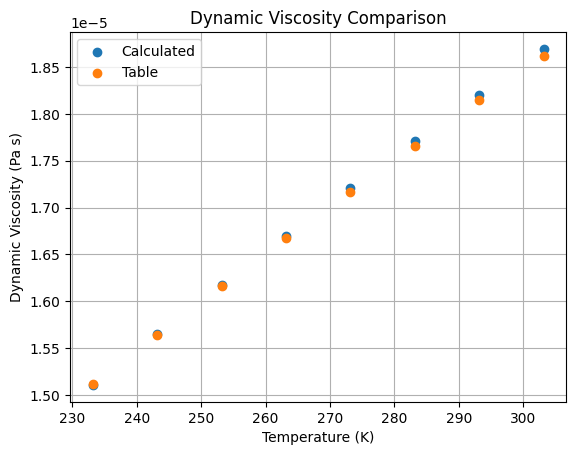

In [11]:
plt.scatter(dynvis_df['T_K'], dynvis_df['dyn_vis_SI_calc'], label='Calculated')
plt.scatter(dynvis_df['T_K'], dynvis_df['dyn_vis_SI'], label='Table')
plt.title("Dynamic Viscosity Comparison")
plt.xlabel("Temperature (K)")
plt.ylabel("Dynamic Viscosity (Pa s)")
plt.legend()
plt.grid()
plt.show()